In [14]:
#|default_exp app

### Bear Classifier

In [54]:
#|export
from fastai.vision.all import *
import gradio as gr
from fastbook import *
from fastai.vision.widgets import *
import gradio as gr
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [55]:
#|export
# def on_data_change(change):
#     lbl_pred.value = ''
#     img = PILImage.create(btn_upload.data[-1])
#     out_pl.clear_output()
#     with out_pl: display(img.to_thumb(128,128))
#     pred,pred_idx,probs = learn_inf.predict(img)
#     lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
    
def is_cat(x): return x[0].isupper()



In [56]:
#|export
learn = load_learner('export.pkl')
print(type(learn))

<class 'fastai.learner.Learner'>


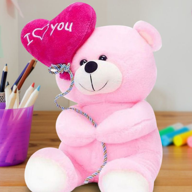

In [57]:
im = PILImage.create('grizzly.jpg')
im.thumbnail((192,192))
im
im2 = PILImage.create('teddy.png')
im2.thumbnail((192,192))
im2

In [58]:
%time learn.predict(im2)

CPU times: total: 172 ms
Wall time: 292 ms


('teddy', tensor(2), tensor([1.6561e-06, 1.1294e-16, 1.0000e+00]))

In [59]:
#|export
categories = ('black', 'grizzly', 'teddy')

In [60]:
#|export
def classify_img(img):
    cat,idx, prob = learn.predict(img)
    return dict(zip(categories, map(float,prob)))

In [61]:
classify_img(im2)

{'black': 1.6561184565944131e-06,
 'grizzly': 1.1294216881191653e-16,
 'teddy': 0.9999983310699463}

In [62]:
#|export
image = gr.inputs.Image(shape = (192,192))
label = gr.outputs.Label()
examples = ['teddy.png', 'grizzly.jpg','black.jpeg']
intf = gr.Interface(fn = classify_img, inputs = image, outputs = label, examples = examples)
intf.launch(inline = False)

C:\Users\teent\anaconda3\Lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\teent\anaconda3\Lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\teent\anaconda3\Lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
C:\Users\teent\anaconda3\Lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


In [63]:
import nbdev
nbdev.export.nb_export('app.ipynb', './')
print('Export successful')

Export successful


In [50]:
# notebook2script('app.ipynb')

NameError: name 'notebook2script' is not defined